# Estimating Wind Speed Distribution with Weibull distribution

https://www.sciencedirect.com/science/article/abs/pii/S0167610599001221#:~:text=The%20Weibull%20distribution%20is%20a,for%20wind%20energy%20calculation%20purposes.

J.V. Seguro, T.W. Lambert,
Modern estimation of the parameters of the Weibull wind speed distribution for wind energy analysis,
Journal of Wind Engineering and Industrial Aerodynamics,
Volume 85, Issue 1,
2000,
Pages 75-84,
ISSN 0167-6105,
https://doi.org/10.1016/S0167-6105(99)00122-1.

Data from: https://a2e.energy.gov/ds/pluswind/plant.c0

In [1]:
import matplotlib.pyplot as plt
import torch 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import csv
import numpy as np
from numpy import genfromtxt
import random

In [2]:
sampled_data = []
matching_parameters = []
MIN_N = 24
MAX_N = 100
MAX_C = 17.2
MAX_K = 29.5

for i in range(0,100000):
    n = 50
    val = []
    c = random.uniform(1,MAX_C)
    k = random.uniform(1,MAX_K)
    matching_parameters.append([c,k])
    y = np.random.weibull(k, n) * c
    sampled_data.append(y)

In [3]:
print(sampled_data[10])

[13.56023066 12.84121607 13.19837734 13.33471026 13.17740792 12.93270051
 13.24923346 12.11185344 13.35175058 11.94512655 12.44782708 12.70240935
 13.10064576 12.74219489 13.40637736 12.62282655 11.4183266  13.25285894
 13.12990005 12.78868791 13.0937881  10.99852416 12.74766596 12.46167944
 12.49869347 12.98398098 12.50774657 12.05376145 12.55543601 12.74674154
 11.13271449 12.34410056 12.7723915  13.04429863 13.12488037 11.83039572
 12.31929613 13.28558664 13.51965839 13.30691607 13.40772714 13.39919768
 13.27881219 11.89346155 11.23755141 13.23617118 12.14197719 13.45490153
 10.46455756 13.6329674 ]


In [4]:
my_data_1 = genfromtxt('plant.c0.2021.692.csv', delimiter=',')
my_data_2 = genfromtxt('plant.c0.2021.7501.csv', delimiter=',')
my_data_3 = genfromtxt('plant.c0.2021.7526.csv', delimiter=',')
my_data_4 = genfromtxt('plant.c0.2021.7771.csv', delimiter=',')
my_data_5 = genfromtxt('plant.c0.2021.7886.csv', delimiter=',')

my_data = np.concatenate((my_data_1, my_data_2, my_data_3, my_data_4,my_data_5), axis=0)

In [85]:
wind_speeds = []

day = []
i = 1
while i < len(my_data):
    day.append(my_data[i][1])
    if i%24 == 0:
        wind_speeds.append(day)
        day = []
    i+=1

In [86]:
print(wind_speeds[10])
print(max(wind_speeds[30]))

[6.818256968691746, 6.67273155749959, 6.673923397922959, 6.755255579440034, 6.927317360322236, 7.016899588073758, 7.066351377084856, 7.262616442874619, 7.413527749850109, 7.493501326877951, 7.698660563128446, 7.693614880706702, 7.514445516513845, 7.521236169727171, 7.6867979495737, 7.775669152999967, 7.414735330071134, 6.788338910401691, 5.8620463255056965, 5.945739653744187, 6.50274405943895, 7.037601618910473, 6.625423193198234, 6.898747930460855]
9.198416772766336


(array([4.0290e+03, 1.0296e+04, 1.3555e+04, 9.1950e+03, 4.2560e+03,
        1.7130e+03, 5.6200e+02, 1.4300e+02, 3.8000e+01, 9.0000e+00]),
 array([1.95359106e-02, 2.07568950e+00, 4.13184308e+00, 6.18799667e+00,
        8.24415026e+00, 1.03003038e+01, 1.23564574e+01, 1.44126110e+01,
        1.64687646e+01, 1.85249182e+01, 2.05810718e+01]),
 <BarContainer object of 10 artists>)

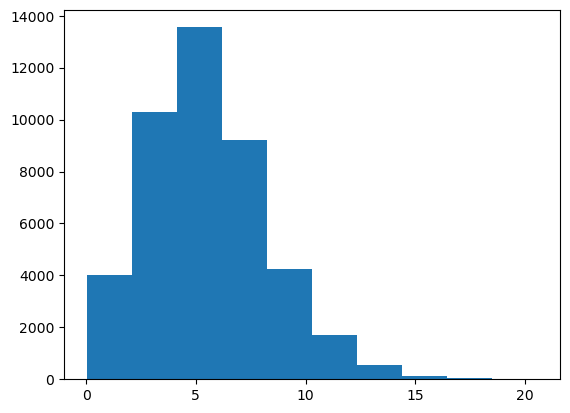

In [87]:
L = []
for i in wind_speeds:
    L += i
plt.hist(L)

## Calculate Labels for training

https://www.kaggle.com/code/esrakrba/weibull-distribution-for-wind-speed/notebook

In [88]:
#definition of weibull distribution
def weibull (x,c,k):
    return (k / c) * (x / c)**(k - 1) * np.exp(-(x / c)**k)

In [89]:
# find k, c parameter
import math
import scipy as sc
def find_parameters(wind_speeds):
    k = (math.sqrt(np.mean(abs(wind_speeds - np.mean(wind_speeds))**2))/np.mean(wind_speeds))**-1.089
    gamma_f = math.exp(sc.special.gammaln(1+(1/k)))
    c = (np.mean(wind_speeds)/gamma_f)
    return [k,c]

In [90]:
print(find_parameters(wind_speeds[10]))

[17.28124475467969, 7.264201670696911]


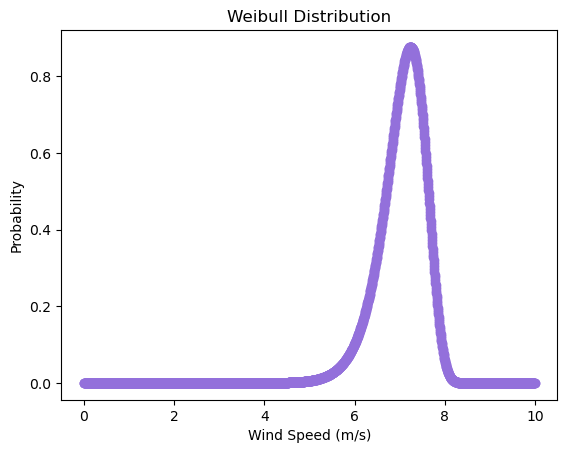

In [91]:
x_plot = []
y_plot = []
curr = 0

[k,c] = find_parameters(wind_speeds[10])
for i in range(0,2000):
    x_plot.append(curr)
    y_plot.append(weibull(curr,c,k))
    curr += 10./2000

    
plt.scatter(x_plot,y_plot,color="mediumpurple")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Probability")
plt.title("Weibull Distribution")
plt.show()

In [92]:
matching_c = []
matching_k = []
matching = []
for i in wind_speeds:
    [k,c] = find_parameters(i)
    if math.isnan(k):
        k = 0
    if math.isnan(c):
        c = 0
    matching_c.append(c)
    matching_k.append(k)
    matching.append([k,c])

In [93]:
print(min(matching_k))

0


## Summary Statistics

In [94]:
 #for estimating k parameter since the model is having trouble w k
summary_stats = []

for i in range(0,len(wind_speeds)):
    stats = []
    stats.append(np.mean(wind_speeds[i]))
    stats.append(np.mean(abs(wind_speeds[i] - np.mean(wind_speeds[i]))))
    #more summary stats
    #stats.append(min(wind_speeds[i]))
    #stats.append(max(wind_speeds[i]))
    #stats.append(np.std(wind_speeds[i]))
    
    if math.isnan(stats[0]) or math.isnan(stats[1]):
        stats = [0,0]
    summary_stats.append(stats)

In [95]:
print(summary_stats)

[[3.338735731276698, 0.6812069262558289], [9.254334806183726, 1.872477184279414], [11.447261540535193, 1.077408594714377], [9.565480266115438, 1.721842604245311], [8.391150917213336, 1.4132578145322334], [7.403815205382775, 1.7009621839846094], [6.306776936338721, 0.7066685348124767], [6.005539903772853, 1.1634134639451044], [2.1757365574448926, 0.4718417735952965], [3.9349375386479597, 1.1503981140105024], [7.044424275125788, 0.4210407860854028], [8.385991080174641, 0.631572787269525], [13.489274810801627, 0.9331085859065835], [10.5553007220191, 2.8768282188986896], [9.094629778004984, 0.9101767821380357], [8.005343301209992, 1.3478795476713081], [8.584204367336744, 1.570646085235196], [7.640474723172443, 2.46978332003065], [2.356789377410353, 0.7361841741784764], [11.088731812232147, 2.1083930170446257], [10.020038113014145, 1.427295282187653], [6.003035605766684, 1.6636183334876469], [2.452281490258692, 0.6659224736538787], [3.177927055981293, 0.9070098685864316], [2.279581371167105

## Organise into Training & Testing Data

In [96]:
for i in range(0,len(wind_speeds)):
    for j in range(24):
        if math.isnan(wind_speeds[i][j]):
            wind_speeds[i][j] = 1.0
    wind_speeds[i] = np.array(wind_speeds[i])
    matching[i] = np.array(matching[i])
    summary_stats[i] = np.array(summary_stats[i])
    
x,y = np.array(summary_stats), np.array(matching)
#y = y.reshape(-1,1)
#x=x.reshape(-1,1)
# x_scaler = MinMaxScaler()
# x_scaled = x_scaler.fit_transform(x)
# y_scaler = MinMaxScaler()
# y_scaled = y_scaler.fit_transform(y)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=5)

In [98]:
X_train = torch.from_numpy(x_train.astype(np.float32))
Y_train = torch.from_numpy(y_train.astype(np.float32))
X_test = torch.from_numpy(x_test.astype(np.float32))
Y_test = torch.from_numpy(y_test.astype(np.float32))

## Training

In [99]:
class myModel(nn.Module):
    def __init__(self, input_dim: int, 
               hidden_dim: int, output_dim: int):
        super(myModel,self).__init__()
        self.myModel=nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Sigmoid(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Sigmoid(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self,x):
        x=self.myModel(x)
        return x

In [100]:
input_dim = X_train.shape[1]
hidden_dim = 10
batch_size = 5
num_workers = 4
output_dim = Y_train.shape[1]

model = myModel(input_dim, hidden_dim, output_dim)
print(model)

myModel(
  (myModel): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=10, out_features=2, bias=True)
  )
)


In [101]:
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [102]:
e = []
l = []
    

In [104]:
for epoch in range(2000,10000):  
    predict_y = model(X_train) 
    loss = loss_func(predict_y, Y_train) 
    optimizer.zero_grad() 
    loss.backward() 

    optimizer.step() 
    print('epoch {}, loss function {}'.format(epoch, loss.item()))
    e.append(epoch)
    l.append(loss.item())

epoch 2000, loss function 8.231452941894531
epoch 2001, loss function 8.230816841125488
epoch 2002, loss function 8.230178833007812
epoch 2003, loss function 8.229540824890137
epoch 2004, loss function 8.228902816772461
epoch 2005, loss function 8.228264808654785
epoch 2006, loss function 8.227625846862793
epoch 2007, loss function 8.226985931396484
epoch 2008, loss function 8.226346969604492
epoch 2009, loss function 8.225707054138184
epoch 2010, loss function 8.225066184997559
epoch 2011, loss function 8.224425315856934
epoch 2012, loss function 8.223786354064941
epoch 2013, loss function 8.223143577575684
epoch 2014, loss function 8.222501754760742
epoch 2015, loss function 8.221860885620117
epoch 2016, loss function 8.221219062805176
epoch 2017, loss function 8.220575332641602
epoch 2018, loss function 8.219932556152344
epoch 2019, loss function 8.21928882598877
epoch 2020, loss function 8.218645095825195
epoch 2021, loss function 8.218001365661621
epoch 2022, loss function 8.21735

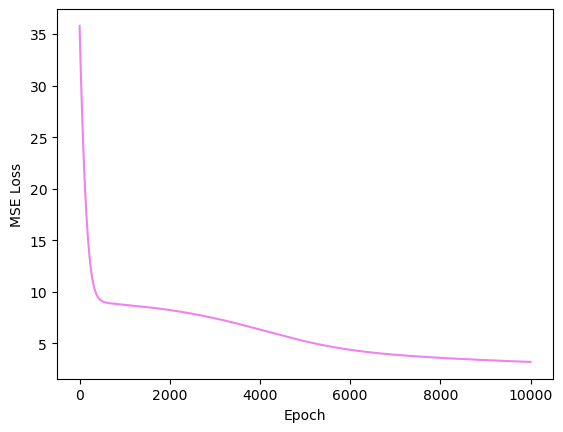

In [105]:
plt.plot(np.array(e), np.array(l), color = 'violet')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

In [106]:
PATH = './wind_model.pth'
torch.save(model.state_dict(), PATH)

## Testing

In [107]:
model = myModel(input_dim, hidden_dim, output_dim)
model.load_state_dict(torch.load(PATH))

with torch.no_grad():
    loss = 0
    temp = X_test.tolist()
    rand_vector = random.sample(range(0, len(temp) -1),random.randint((len(temp)-1)//2, len(temp)-1))
    selected = [temp[i] for i in rand_vector]
    selected = np.array(selected)
    train_data = torch.from_numpy(selected.astype(np.float32))
    
    predictions = model(train_data)
    temp1 = Y_test.tolist()
    selected_test = [temp1[i] for i in rand_vector]
    selected_test = np.array(selected_test)
    train_data1 = torch.from_numpy(selected_test.astype(np.float32))
    
    labels = ((train_data1))
    predictions = ((predictions))
    loss += nn.functional.mse_loss(predictions, labels)
    print(f'MSE Loss: {loss}')


MSE Loss: 2.8338656425476074


In [108]:
predicted_k = []
predicted_c = []
actual_k = []
actual_c = []
for i in predictions:
    predicted_k.append(i[0])
    predicted_c.append(i[1])
for i in labels:
    actual_k.append(i[0])
    actual_c.append(i[1])

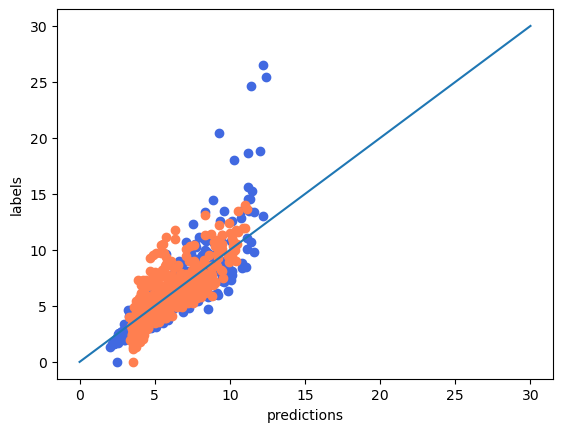

In [109]:
plt.scatter(predicted_k, actual_k, color = "royalblue")
plt.scatter(predicted_c, actual_c, color = "coral")
plt.xlabel("predictions")
plt.ylabel("labels")
plt.plot([0,30],[0,30])
plt.savefig("good_weibull.svg")

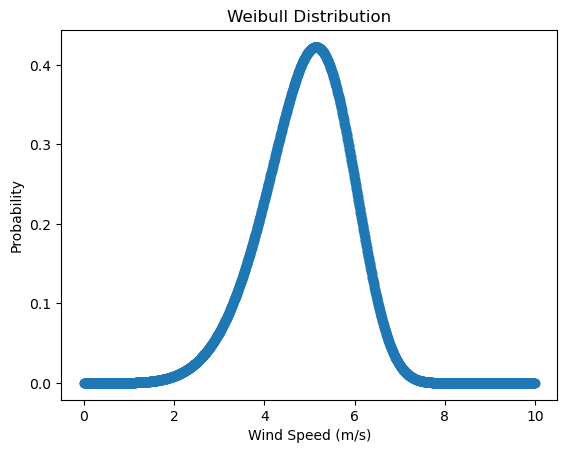

In [57]:
x_plot = []
y_plot = []
curr = 0

[k,c] = [6,5.3]
for i in range(0,2000):
    x_plot.append(curr)
    y_plot.append(weibull(curr,c,k))
    curr += 10./2000

    
plt.scatter(x_plot,y_plot)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Probability")
plt.title("Weibull Distribution")
plt.show()

In [ ]:
plt.hist(L,bins=20)